In [14]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

INF = 99999999
RELATION = 1/111111

In [41]:
def __gravitational_forces(matrix_points):
  NUM_COORDS = 2
  x,y = matrix_points.shape
  ## Model hyperparams
  M, N, s_1, s_2 = 1, 20, 5, 5
  matrix_budget_local= np.tile(matrix_points, x)
  matrix_points_local = np.repeat(matrix_points.reshape\
    ((1,matrix_points.shape[0]*matrix_points.shape[1])), matrix_points.shape[0], axis = 0)
  # Forces over not by
  distance_matrix = (-1)*(matrix_budget_local - \
    matrix_points_local).reshape((matrix_points.shape[0]*matrix_points.shape[0],NUM_COORDS))*(RELATION)**(-1)
  dists = distance_matrix
  C = (M*N)/(np.sqrt(np.pi*2))
  d = (np.sqrt(s_1**2+s_2**2))**(-1)
  expo = np.exp(-(dists**2)*d**2/2)
  step = C*d**3*np.multiply(dists**2*d**2,expo)
  # step = np.repeat(step.reshape((step.shape[0],1)), NUM_COORDS, axis = 1)
  movement_per_point = (np.multiply(step, distance_matrix)).reshape((matrix_points.shape[0],matrix_points.shape[0],NUM_COORDS))
  movement_per_point = np.sum(movement_per_point, axis = 1)
  return movement_per_point

def __spring_force(matrix_original_points, matrix_points, k = 0.005):
      return k*(matrix_original_points - matrix_points)*(RELATION)**(-1)

* Naive example

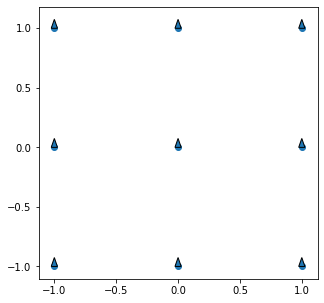

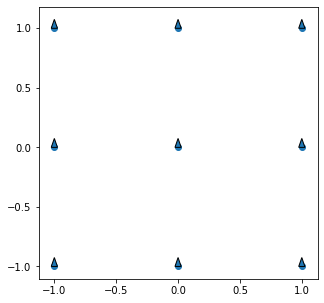

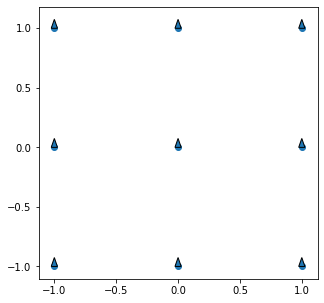

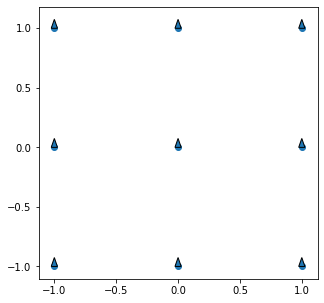

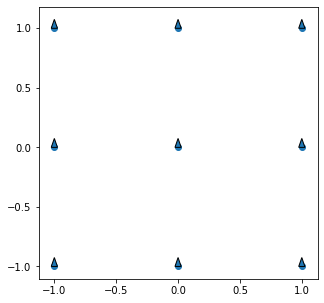

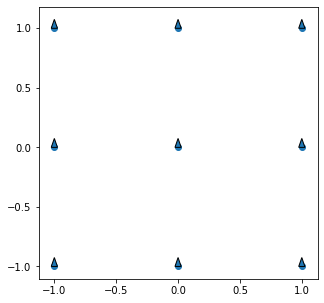

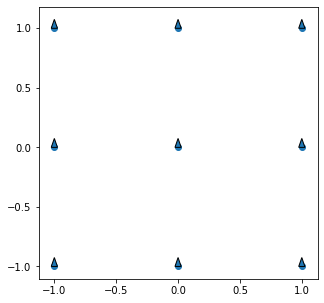

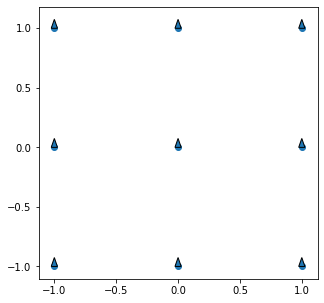

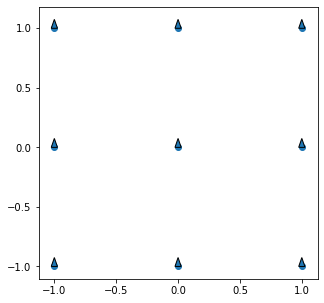

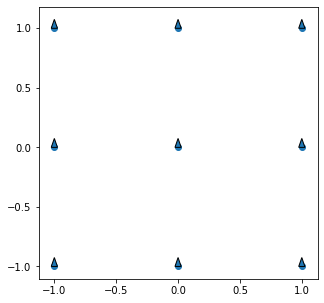

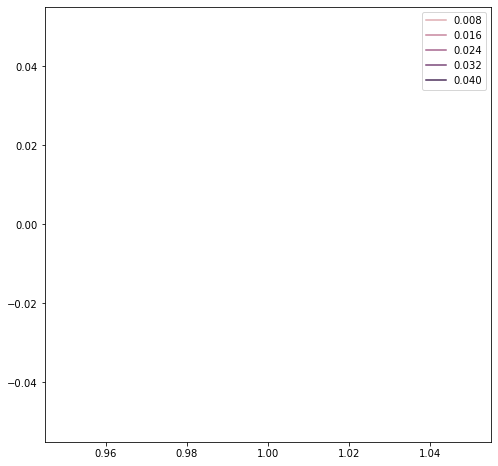

In [62]:
learning_rate = 10e-2
tol = 10e-5
forces, ks, its = [], [], []
for k in np.arange(0.0005, 0.05, 0.005):
    it, max_its = 0, 100
    convergence_criterion = INF
    matrix_points = np.array([[0,0], [-1,0], [1,0], [0,1], [0,-1],[-1,1],[-1,-1],[1,-1],[1,1]])
    updated_matrix_points = np.array([[0,0], [-1,0], [1,0], [0,1], [0,-1],[-1,1],[-1,-1],[1,-1],[1,1]])
    plt.figure(figsize = (5,5))
    plt.scatter(x = matrix_points[:,0], y = matrix_points[:,1])
    while it < max_its and tol < convergence_criterion:
        forces_per_points = __spring_force(matrix_points, updated_matrix_points, k) \
            + __gravitational_forces(updated_matrix_points)
        it += 1
        for i in range(matrix_points.shape[0]):
            mag = np.linalg.norm(forces_per_points[i,:])
            plt.arrow(dx = forces_per_points[i,0], dy = forces_per_points[i,1], \
                x = updated_matrix_points[i,0], y = updated_matrix_points[i,1], head_width = 0.05)
        convergence_criterion = np.sum(np.linalg.norm(forces_per_points))
        forces.append(convergence_criterion)
        ks.append(k)
        its.append(it)
        updated_matrix_points = updated_matrix_points + (forces_per_points*learning_rate)
    plt.show()
df_plot = pd.DataFrame(zip(its, forces, ks), columns = ['iterations', 'forces', 'k'])
plt.figure(figsize = (8,8))
sns.lineplot(x = its, y = forces, data  = df_plot, hue = ks)
plt.show()

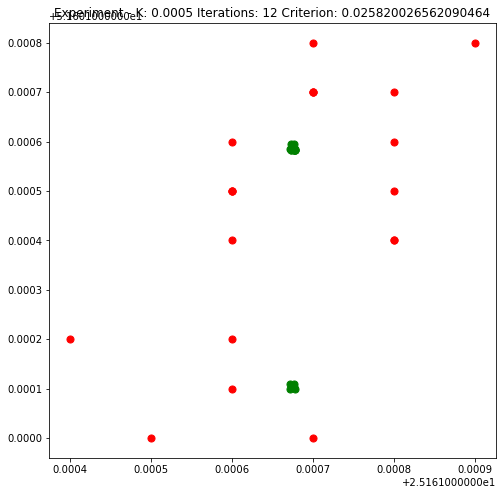

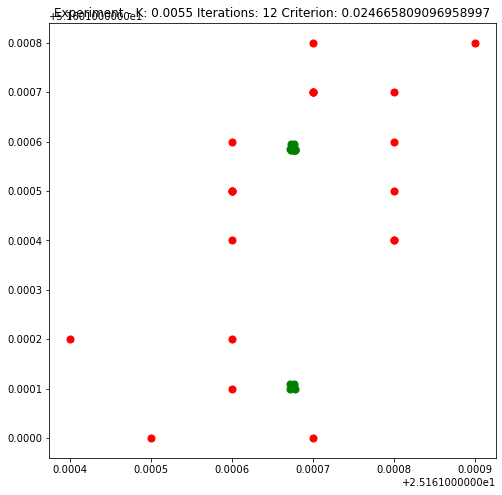

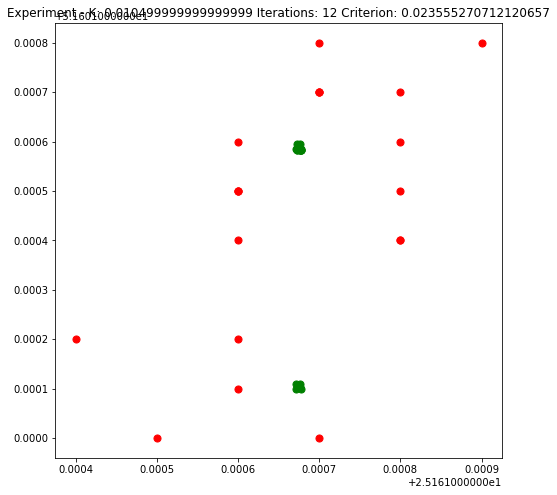

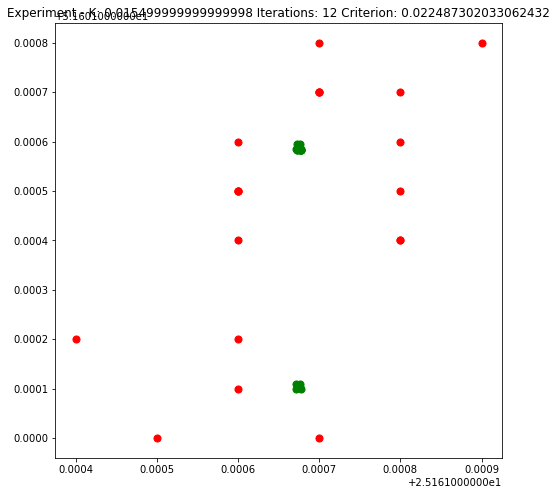

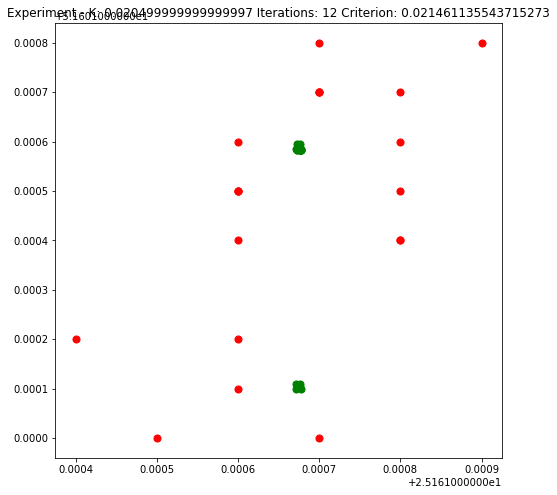

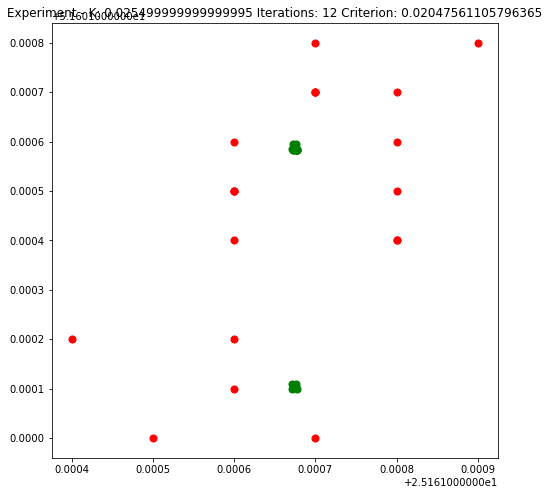

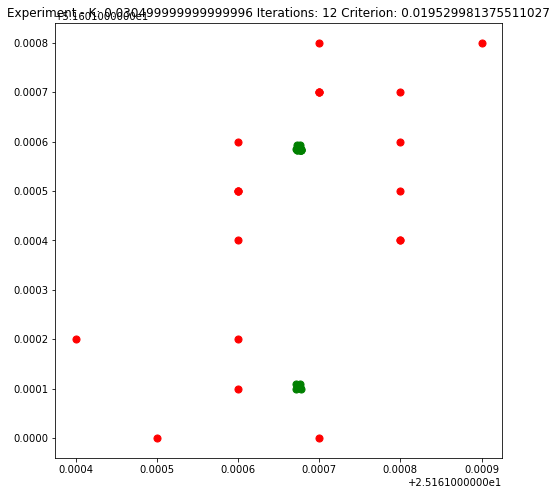

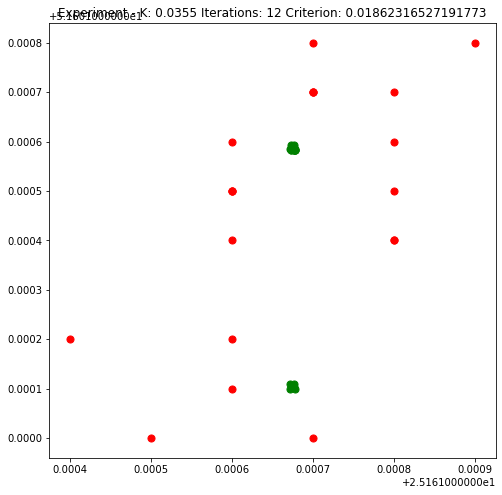

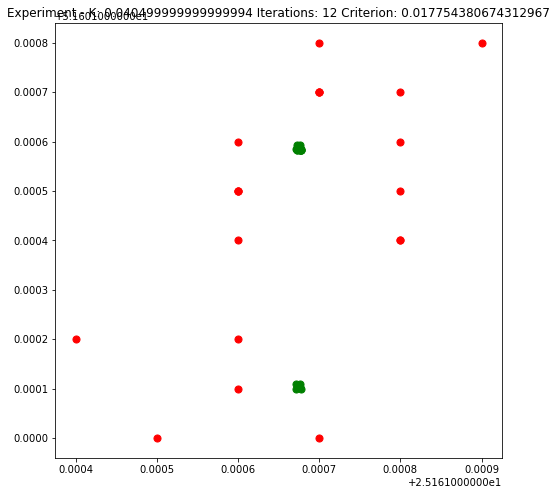

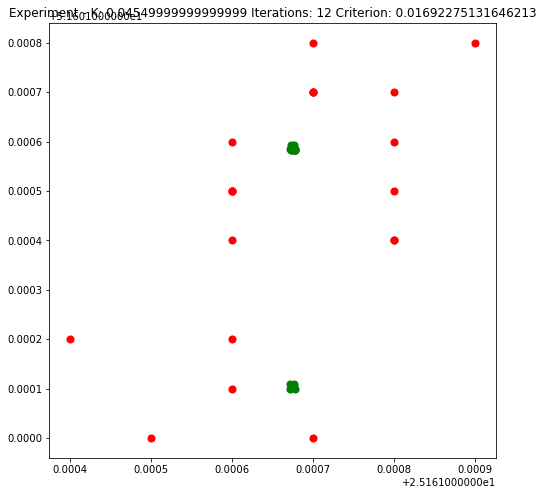

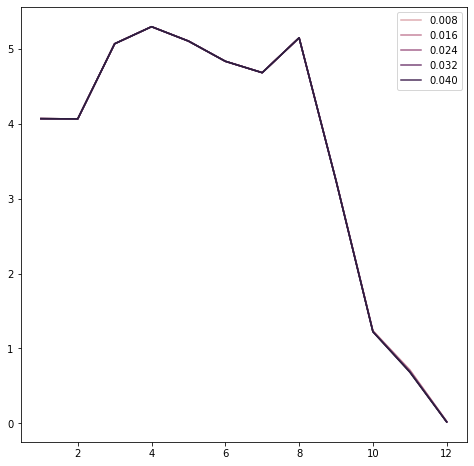

In [73]:
learning_rate = 10e-5
tol = 0.1
forces, ks, its = [], [], []
for k in np.arange(0.0005, 0.05, 0.005):
    it, max_its = 0, 10000
    convergence_criterion = INF
    matrix_points = np.array([[25.1618, 51.6015],[25.1617,51.601], [25.1617,51.6017],\
                [25.1617,51.6018], [25.1616,51.6011],[25.1616,51.6016],[25.1617,51.6017],\
                [25.1615,51.601 ],[25.1614,51.6012],[25.1617,51.6017],[25.1618,51.6014],\
                [25.1616,51.6012], [25.1616,51.6015], [25.1616,51.6014], [25.1618, 51.6016],\
                [25.1619,51.6018],[25.1616,51.6015],[25.1616,51.6015],[25.1618,51.6014],[25.1618,51.6017]])
    updated_matrix_points = matrix_points
    plt.figure(figsize = (8,8))
    plt.scatter(x = matrix_points[:,0], y = matrix_points[:,1], s = 50.0, color = 'r')
    while it < max_its and tol < convergence_criterion:
        forces_per_points = __spring_force(matrix_points, updated_matrix_points, k) \
            + __gravitational_forces(updated_matrix_points)
        it += 1
        cur_forces = np.sum(np.linalg.norm(forces_per_points))
        convergence_criterion = cur_forces if cur_forces < convergence_criterion else tol
        forces.append(convergence_criterion)
        ks.append(k)
        its.append(it)
        updated_matrix_points = updated_matrix_points + (forces_per_points*learning_rate)
    '''for i in range(matrix_points.shape[0]):
        mag = np.linalg.norm(forces_per_points[i,:])
        plt.arrow(dx = (updated_matrix_points[i,0] - matrix_points[i,0]),
            dy = (updated_matrix_points[i,1] - matrix_points[i,1]), \
            x = matrix_points[i,0], y = matrix_points[i,1], width = 0.01*10**(-3),head_width = 0.0000125'''
    plt.scatter(x = updated_matrix_points[:,0], y = updated_matrix_points[:,1], s = 50.0, color = 'g')
    plt.title('Experiment - K: '+str(k)+' Iterations: '+str(it)+' Criterion: '+str(convergence_criterion))
    plt.show()
df_plot = pd.DataFrame(zip(its, forces, ks), columns = ['iterations', 'forces', 'k'])
plt.figure(figsize = (8,8))
sns.lineplot(x = its, y = forces, data  = df_plot, hue = ks)
plt.show()